In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('WineQT.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [5]:
df = df.drop('Id', axis=1)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [6]:
from sklearn.preprocessing import StandardScaler
target_column = 'quality' 

X = df.drop(target_column, axis=1)  
y = df[target_column]                

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_standardized = pd.DataFrame(X_standardized, columns=X.columns)

print(X_standardized.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
1      -0.292593          1.941813    -1.365027        0.050060   0.234247   
2      -0.292593          1.273492    -1.161568       -0.171289   0.107253   
3       1.653789         -1.399789     1.483400       -0.466421  -0.252560   
4      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
1             0.915920              0.643477  0.036165 -0.708928   0.130881   
2            -0.060071              0.246745  0.140103 -0.325775  -0.045254   
3             0.135127              0.429852  0.659792 -0.964363  -0.456235   
4            -0.450467             -0.363610  0.555854  1.270695  -0.573658   

    alcohol  
0 -0.963382  
1 -0.593601  
2 -0.593601  


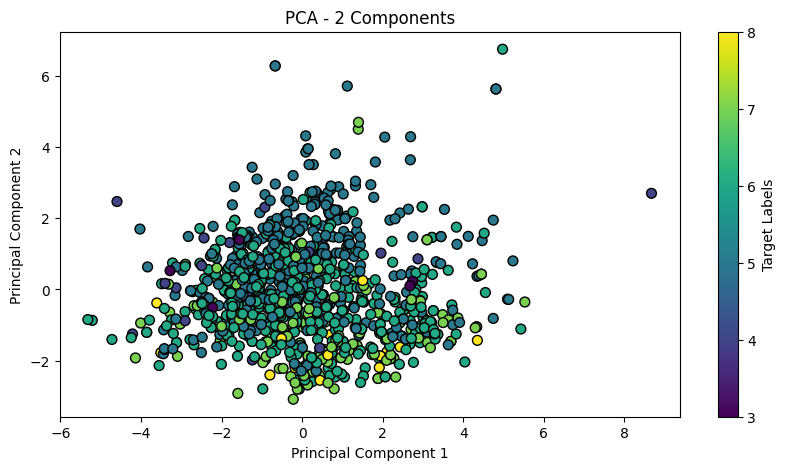

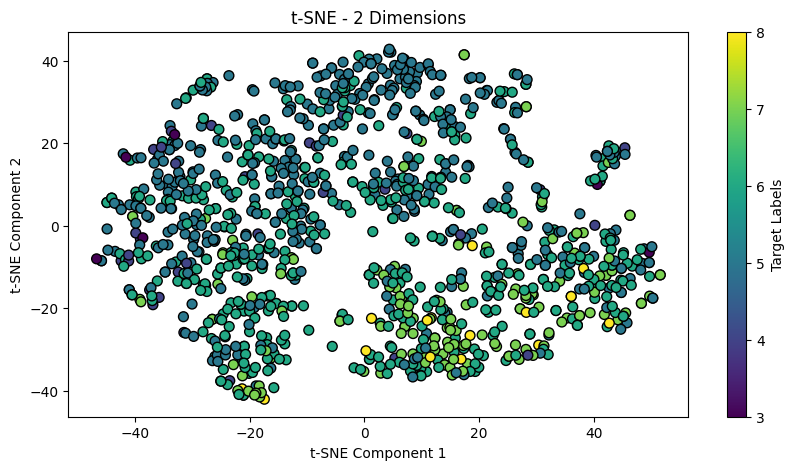

Silhouette Score (PCA): 0.3121113876407546
Silhouette Score (Original): 0.18838316615696873
Adjusted Rand Index (PCA): 0.03615651187602217
Adjusted Rand Index (Original): 0.07817746425737573


In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Visualize PCA results
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Labels')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

# Visualize t-SNE results
plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE - 2 Dimensions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target Labels')
plt.show()

# K-Means Clustering
kmeans_pca = KMeans(n_clusters=len(y.unique()), random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

kmeans_original = KMeans(n_clusters=len(y.unique()), random_state=42)
labels_original = kmeans_original.fit_predict(X_standardized)

# Calculate silhouette scores
silhouette_pca = silhouette_score(X_pca, labels_pca)
silhouette_original = silhouette_score(X_standardized, labels_original)

# Calculate adjusted Rand index
ari_pca = adjusted_rand_score(y, labels_pca)
ari_original = adjusted_rand_score(y, labels_original)

# Print results
print(f'Silhouette Score (PCA): {silhouette_pca}')
print(f'Silhouette Score (Original): {silhouette_original}')
print(f'Adjusted Rand Index (PCA): {ari_pca}')
print(f'Adjusted Rand Index (Original): {ari_original}')